In [1]:
import pandas as pd
import numpy as np
from utiles import *
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
sin = cargar(one_row=True)
clases, datos = load_data_dif(dif=False)
datos.shape

(566, 1558)

In [20]:
clases.index

Index(['sudan 4 - 5%', 'sudan 4 - 2,5%', 'sudan 2 - 2,5%', 'sudan 4 - 1%',
       'sudan 1 - 5%', 'sudan 2 - 1%', 'sudan 1 - 2,5%', 'sudan 2 - 5%',
       'sin adulterar', 'para red - 5%', 'sudan 3 - 5%', 'para red - 1%',
       'sudan 1 - 1%', 'para red - 2,5%'],
      dtype='object')

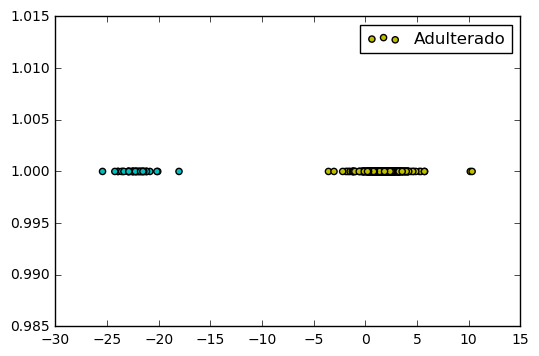

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sca = StandardScaler()
lda = LinearDiscriminantAnalysis(n_components=2)

scaled_data = sca.fit_transform(datos.iloc[:,:-1])
x_train, x_test, y_train, y_test = train_test_split(scaled_data, datos["clase"])

xx_train = lda.fit_transform(x_train, y_train)
xx_test = lda.transform(x_test)

# Uniendo conjuntos de entrenamiento y testeo solo para plotear como se ven
dt = pd.concat([pd.DataFrame(xx_train), pd.DataFrame(xx_test)], ignore_index=True)
rta = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_test)], ignore_index=True)

col = ["c", "y"]
colores = [col[x] for x in rta["clase"]]
plt.figure()
plt.scatter(dt[:], np.ones_like(dt.values), c=colores)
plt.legend(["Adulterado"])
plt.show()

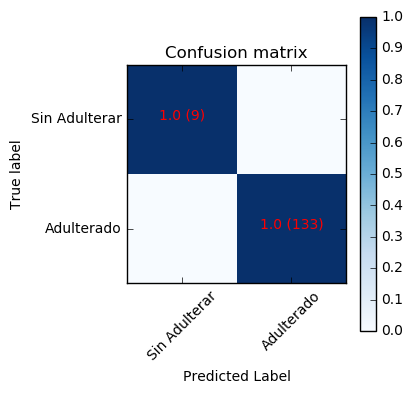

In [5]:
predict = lda.predict(x_test)
a_mat = confusion_matrix(y_test, predict)
plot_confusion_matrix(a_mat, classes=["Sin Adulterar", "Adulterado"])

## Con 3 y 4 clases a la vez

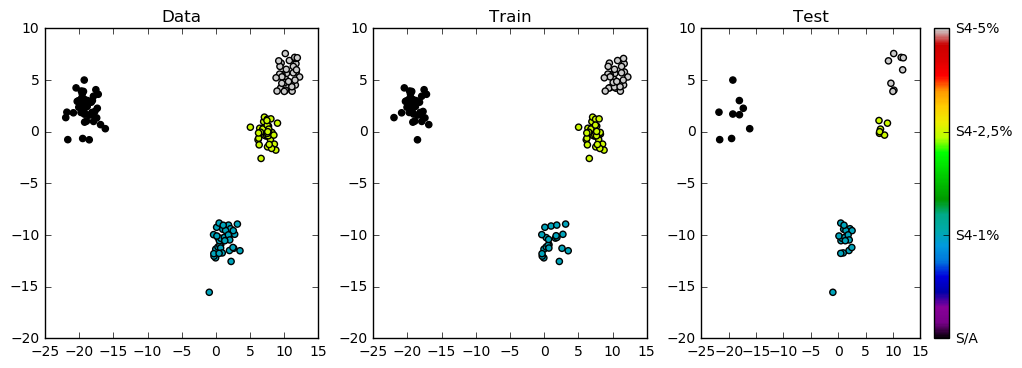

In [6]:
sin = cargar(one_row=True)
# sudan1 = cargar("data/sudan 1 - 1%", one_row=True, clase=1)
# para = cargar("data/para red - 1%", one_row=True, clase=2)
# sudan2 = cargar("data/sudan 2 - 1%", one_row=True, clase=3)

sudan1 = cargar("data/sudan 4 - 1%", one_row=True, clase=1)
para = cargar("data/sudan 4 - 2,5%", one_row=True, clase=2)
sudan2 = cargar("data/sudan 4 - 5%", one_row=True, clase=3)

# data = pd.concat([sin, sudan1, para], ignore_index=True)               #Para 3 clases a la vez
data = pd.concat([sin, sudan1, para, sudan2], ignore_index=True)       #Para 4 clases a la vez

# lda = LinearDiscriminantAnalysis(n_components=2)                       #Para 3 clases a la vez
lda = LinearDiscriminantAnalysis(n_components=3)                       #Para 4 clases a la vez

c_train_x, c_test_x, c_train_y, c_test_y = train_test_split(data.iloc[:,:-1], data["clase"])
c_train_xx = lda.fit(c_train_x, c_train_y).transform(c_train_x)
c_test_xx = lda.transform(c_test_x)

## Uniendo conjuntos de entrenamiento y testeo solo para plotear
comp_again = pd.concat([pd.DataFrame(c_train_xx), pd.DataFrame(c_test_xx)], ignore_index=True)
rta_again = pd.concat([pd.DataFrame(c_train_y), pd.DataFrame(c_test_y)], ignore_index=True)

tr, ts = {"x":c_train_xx, "y":c_train_y}, {"x":c_test_xx, "y":c_test_y}
plot_data_train_test(comp_again.values, rta_again, tr, ts, names=["S/A", "S4-1%", "S4-2,5%", "S4-5%"])

### Por simplicidad se ha omitido la tercera dimensión, por lo cual aunque hayan dos grupos que se vean cercanos, los mismos son facilmente separables si se toma en cuenta una dimensión más.

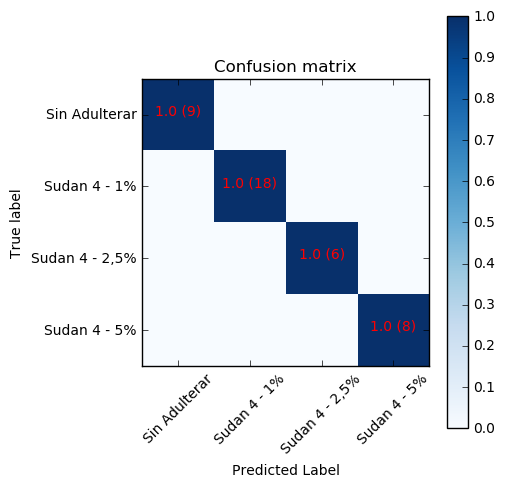

In [7]:
m_predict = lda.predict(c_test_x)
a_mat = confusion_matrix(c_test_y, m_predict)
plot_confusion_matrix(a_mat, classes=["Sin Adulterar", "Sudan 4 - 1%", "Sudan 4 - 2,5%", "Sudan 4 - 5%"], size=(5,5))
# plot_confusion_matrix(a_mat, classes=["Sin Adulterar", "Sudan 1", "Para red 1", "Sudan 2"], size=(5,5))

## Todos los tipos a la vez

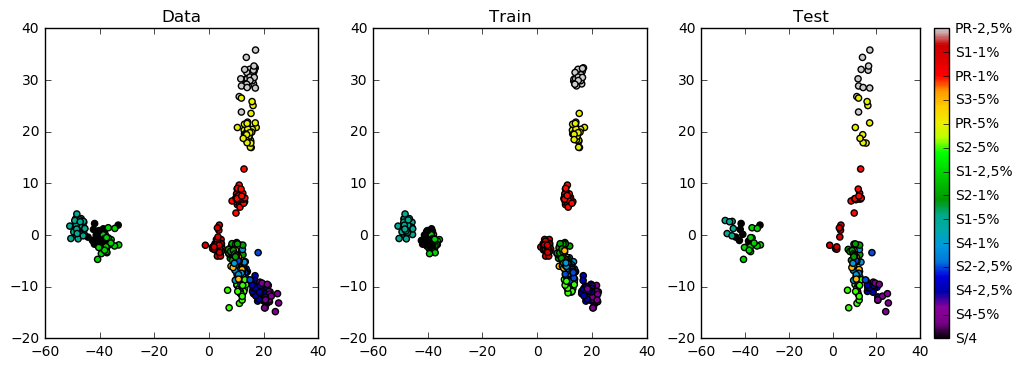

In [8]:
clases, data = load_data(dif=True)

dims = len(np.unique(clases))-1
lda = LinearDiscriminantAnalysis(n_components=dims)

c_train_x, c_test_x, c_train_y, c_test_y = train_test_split(data.iloc[:,:-1], data["clase"])
c_train_xx = lda.fit(c_train_x, c_train_y).transform(c_train_x)
c_test_xx = lda.transform(c_test_x)

## Uniendo conjuntos de entrenamiento y testeo solo para plotear
comp_again = pd.concat([pd.DataFrame(c_train_xx), pd.DataFrame(c_test_xx)], ignore_index=True)
rta_again = pd.concat([pd.DataFrame(c_train_y), pd.DataFrame(c_test_y)], ignore_index=True)

nm = ["S/4", "S4-5%", "S4-2,5%", "S2-2,5%", "S4-1%", "S1-5%", "S2-1%",
      "S1-2,5%", "S2-5%", "PR-5%", "S3-5%", "PR-1%", "S1-1%", "PR-2,5%"]
tr, ts = {"x":c_train_xx, "y":c_train_y}, {"x":c_test_xx, "y":c_test_y}
plot_data_train_test(comp_again.values, rta_again, tr, ts, names=nm)

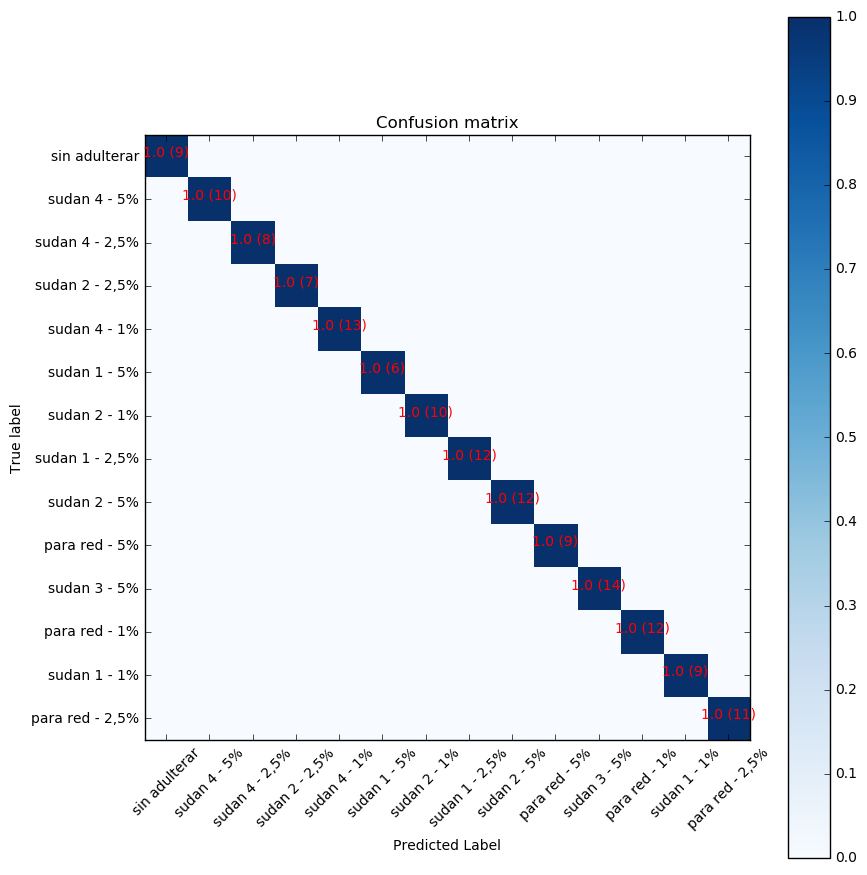

In [9]:
m_predict = lda.predict(c_test_x)
a_mat = confusion_matrix(c_test_y, m_predict)
plot_confusion_matrix(a_mat, classes=clases.columns, size=(9,9))

### Buscando reconocer las frecuencias más importantes

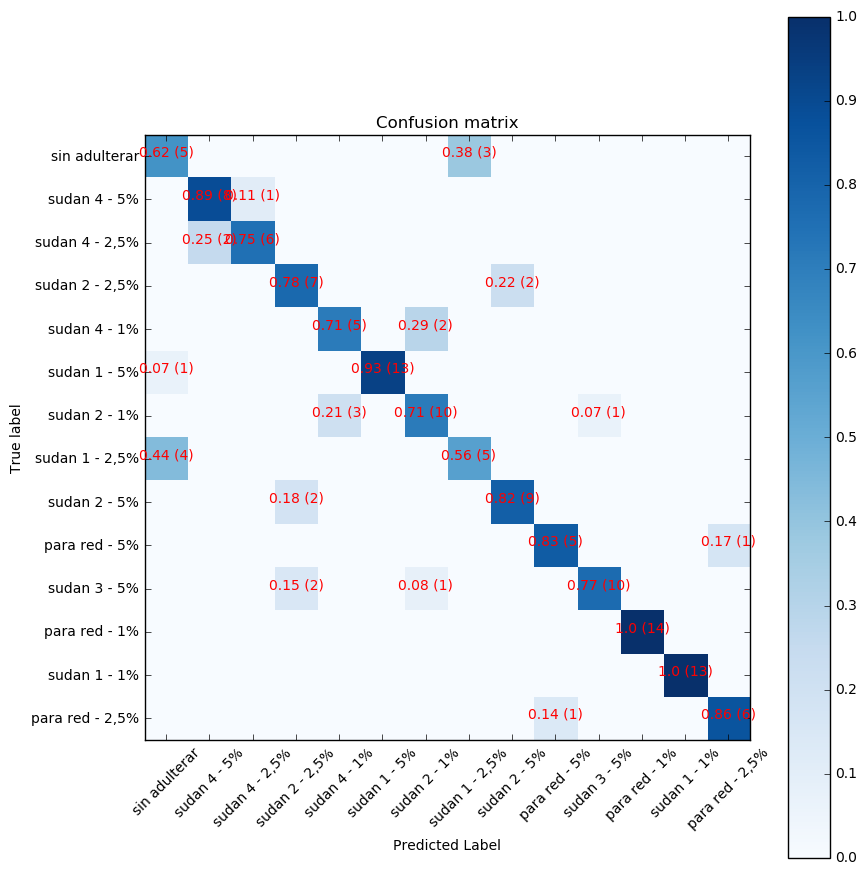

In [17]:
from sklearn.tree import ExtraTreeClassifier

clases, datos = load_data_dif(dif=True)

sca = StandardScaler()
lda = LinearDiscriminantAnalysis(n_components=2, store_covariance=True)
tree = ExtraTreesClassifier(max_depth=4, n_estimators=50, criterion="entropy", n_jobs=4)

scaled_data = sca.fit_transform(datos.iloc[:,:-1])
x_train, x_test, y_train, y_test = train_test_split(scaled_data, datos["clase"])

# LDA
xx_train = lda.fit_transform(x_train, y_train)
xx_test = lda.transform(x_test)

# TREE
xx_train_t = tree.fit(xx_train, y_train)
# xx_test_t = tree.transform(xx_test)

# Uniendo conjuntos de entrenamiento y testeo solo para plotear como se ven
# dt = pd.concat([pd.DataFrame(xx_train), pd.DataFrame(xx_test)], ignore_index=True)
# rta = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_test)], ignore_index=True)

# col = ["c", "y"]
# colores = [col[x] for x in rta["clase"]]
# plt.figure()
# plt.scatter(dt[:], np.ones_like(dt.values), c=colores)
# plt.legend(["Adulterado"])
# plt.show()

m_predict = tree.predict(xx_test)
a_mat = confusion_matrix(y_test, m_predict)
plot_confusion_matrix(a_mat, classes=clases.columns, size=(9, 9))
# plot_confusion_matrix(a_mat, classes=["S/A", "A"])

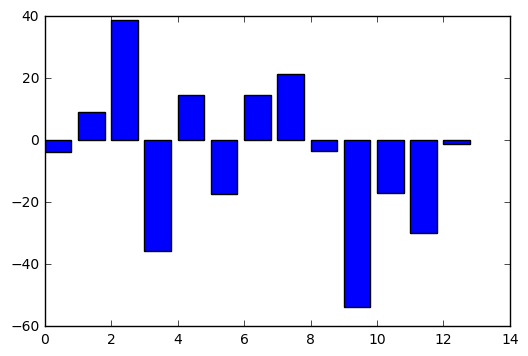

In [18]:
plt.figure()
x = range(len(lda.scalings_[0]))
plt.bar(x, lda.scalings_[0])
plt.show()